# Korrelationen über alle Jahre hinweg (ab 2012)

In [282]:
import pandas as pd
import altair as alt
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [283]:
# Aktuelle Pfade
file_paths = [
     "data/rad_2022_tage_19_06_23_r.csv",
     "data/rad_2021_tage_19_06_23_r.csv",
     "data/rad_2020_tage_19_06_23_r.csv",
     "data/rad_2019_tage_19_06_23_r.csv",
     "data/rad_2018_tage_19_06_23_r.csv",
     "data/rad_2017_tage_19_06_23_r.csv",
     "data/rad_2016_tage_19_06_23_r.csv",
     "data/rad_2015_tage_19_06_23_r.csv",
     "data/rad_2014_tage_19_06_23_r.csv",
     "data/rad_2013_tage_19_06_23_r.csv",
     "data/rad_2012_tage_19_06_23_r.csv",
     "data/rad_2011_tage_19_06_23_r.csv",
     "data/rad_2010_tage_19_06_23_r.csv",
     "data/rad_2009_tage_19_06_23_r.csv",
     "data/rad_2008_tage_19_06_23_r.csv"
]

# Ein großes Dataframe (df) aus allen Dateien erstellen

In [284]:
df_list = []

for file_path in file_paths:
    df_temp = pd.read_csv(file_path)
    df_list.append(df_temp)

# Einzelne DataFrames zu einem Gesamt-DataFrame zusammenführen
df = pd.concat(df_list, ignore_index=True)

In [285]:
# Ersten 5 Zeilen anzeigen
df.head()

,datum,zaehlstelle,uhrzeit_start,uhrzeit_ende,richtung_1,richtung_2,gesamt,min.temp,max.temp,niederschlag,bewoelkung,sonnenstunden,kommentar
0,2022-01-01,Arnulf,00:00,23:59,444.0,0.0,444.0,3.2,13.4,0.0,68,7.6,NaN
1,2022-01-02,Arnulf,00:00,23:59,476.0,0.0,476.0,1.9,15.8,0.0,80,4.7,NaN
2,2022-01-03,Arnulf,00:00,23:59,752.0,0.0,752.0,8.7,11.5,0.7,99,0.0,NaN
3,2022-01-04,Arnulf,00:00,23:59,603.0,0.0,603.0,3.7,16.5,10.3,98,1.0,NaN
4,2022-01-05,Arnulf,00:00,23:59,578.0,0.0,578.0,0.3,3.9,1.2,95,0.4,NaN


In [286]:
# Datentypen ausgeben
df.dtypes

datum             object
zaehlstelle       object
uhrzeit_start     object
uhrzeit_ende      object
richtung_1       float64
richtung_2       float64
gesamt           float64
min.temp         float64
max.temp         float64
niederschlag     float64
bewoelkung         int64
sonnenstunden    float64
kommentar         object
dtype: object

## 'uhrzeit_ende'-Spalte wird gelöscht, weil sonst NaN-Werte vorhanden

In [ ]:
df = df.drop(columns=['uhrzeit_ende'], errors='ignore')
# errors='ignore': nicht vorhandene Spalten werden ignoriert beim Löschen

In [228]:
df

,datum,zaehlstelle,uhrzeit_start,uhrzeit_ende,richtung_1,richtung_2,gesamt,min.temp,max.temp,niederschlag,bewoelkung,sonnenstunden,kommentar
0,2022-01-01,Arnulf,00:00,23:59,444.0,0.0,444.0,3.2,13.4,0.0,68,7.6,NaN
1,2022-01-02,Arnulf,00:00,23:59,476.0,0.0,476.0,1.9,15.8,0.0,80,4.7,NaN
2,2022-01-03,Arnulf,00:00,23:59,752.0,0.0,752.0,8.7,11.5,0.7,99,0.0,NaN
3,2022-01-04,Arnulf,00:00,23:59,603.0,0.0,603.0,3.7,16.5,10.3,98,1.0,NaN
4,2022-01-05,Arnulf,00:00,23:59,578.0,0.0,578.0,0.3,3.9,1.2,95,0.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24072,2012-12-27,Olympia,00:00,23:59,204.0,202.0,406.0,4.4,9.3,8.7,85,0.0,NaN
24073,2012-12-28,Olympia,00:00,23:59,210.0,219.0,429.0,-1.4,6.5,0.6,80,0.0,NaN
24074,2012-12-29,Olympia,00:00,23:59,367.0,380.0,747.0,-3.1,7.0,0.0,64,5.9,NaN
24075,2012-12-30,Olympia,00:00,23:59,412.0,437.0,849.0,-3.3,9.2,0.0,34,3.5,NaN


In [ ]:
df.dtypes

In [229]:
df.describe()

,richtung_1,richtung_2,gesamt,min.temp,max.temp,niederschlag,bewoelkung,sonnenstunden
count,23389.000000,23389.000000,23389.000000,24077.000000,24077.000000,24077.000000,24077.000000,24077.000000
mean,1000.181410,817.916285,1818.097695,5.752029,15.097724,2.381127,69.794783,5.274590
std,902.906725,877.860113,1704.502012,6.827176,9.047298,5.441642,28.577241,4.675189
min,0.000000,0.000000,0.000000,-23.100000,-9.900000,0.000000,0.000000,0.000000
25%,310.000000,132.000000,563.000000,0.600000,7.700000,0.000000,53.000000,0.600000
50%,756.000000,504.000000,1288.000000,5.700000,15.300000,0.000000,79.000000,4.300000
75%,1435.000000,1230.000000,2516.000000,11.300000,22.200000,2.100000,94.000000,9.200000
max,6152.000000,14107.000000,15009.000000,21.500000,36.900000,71.200000,100.000000,15.700000


# NaN-Werte in der Spalte 'gesamt' mit dem Mittelwert auffüllen

In [238]:
# NaN-Werte in der Spalte 'gesamt' mit dem Mittelwert auffüllen
df['gesamt'] = pd.to_numeric(df['gesamt'], errors='coerce').fillna(1818.097695)

In [239]:
df.dtypes

datum             object
zaehlstelle       object
uhrzeit_start     object
uhrzeit_ende      object
richtung_1       float64
richtung_2       float64
gesamt           float64
min.temp         float64
max.temp         float64
niederschlag     float64
bewoelkung         int64
sonnenstunden    float64
kommentar         object
dtype: object

In [240]:
df.describe()

,richtung_1,richtung_2,gesamt,min.temp,max.temp,niederschlag,bewoelkung,sonnenstunden
count,23389.000000,23389.000000,24077.000000,24077.000000,24077.000000,24077.000000,24077.000000,24077.000000
mean,1000.181410,817.916285,1818.097695,5.752029,15.097724,2.381127,69.794783,5.274590
std,902.906725,877.860113,1679.971420,6.827176,9.047298,5.441642,28.577241,4.675189
min,0.000000,0.000000,0.000000,-23.100000,-9.900000,0.000000,0.000000,0.000000
25%,310.000000,132.000000,580.000000,0.600000,7.700000,0.000000,53.000000,0.600000
50%,756.000000,504.000000,1341.000000,5.700000,15.300000,0.000000,79.000000,4.300000
75%,1435.000000,1230.000000,2467.000000,11.300000,22.200000,2.100000,94.000000,9.200000
max,6152.000000,14107.000000,15009.000000,21.500000,36.900000,71.200000,100.000000,15.700000


In [ ]:
mixed_types = df['niederschlag'].apply(type).unique()
print(mixed_types)

In [ ]:
# Versuche, die Spalte in numerische Werte umzuwandeln und markiere Nicht-Zahlen
non_numeric_mask = pd.to_numeric(df['niederschlag'], errors='coerce').isna()

# Zeige die Zeilen mit Nicht-Zahlen an
print(df[non_numeric_mask])

# Mache die Werte in einer Spalte zu Floats

In [ ]:
df['niederschlag'] = df['niederschlag'].str.replace(',', '.')
df['niederschlag'] = pd.to_numeric(df['niederschlag'])

In [ ]:
df['min.temp'] = df['min.temp'].str.replace(',', '.')
df['min.temp'] = pd.to_numeric(df['min.temp'])

In [ ]:
df['max.temp'] = df['max.temp'].str.replace(',', '.')
df['max.temp'] = pd.to_numeric(df['max.temp'])

In [ ]:
df['sonnenstunden'] = df['sonnenstunden'].str.replace(',', '.')
df['sonnenstunden'] = pd.to_numeric(df['sonnenstunden'])

In [237]:
df

,datum,zaehlstelle,uhrzeit_start,uhrzeit_ende,richtung_1,richtung_2,gesamt,min.temp,max.temp,niederschlag,bewoelkung,sonnenstunden,kommentar
0,2022-01-01,Arnulf,00:00,23:59,444.0,0.0,444.0,3.2,13.4,0.0,68,7.6,NaN
1,2022-01-02,Arnulf,00:00,23:59,476.0,0.0,476.0,1.9,15.8,0.0,80,4.7,NaN
2,2022-01-03,Arnulf,00:00,23:59,752.0,0.0,752.0,8.7,11.5,0.7,99,0.0,NaN
3,2022-01-04,Arnulf,00:00,23:59,603.0,0.0,603.0,3.7,16.5,10.3,98,1.0,NaN
4,2022-01-05,Arnulf,00:00,23:59,578.0,0.0,578.0,0.3,3.9,1.2,95,0.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24072,2012-12-27,Olympia,00:00,23:59,204.0,202.0,406.0,4.4,9.3,8.7,85,0.0,NaN
24073,2012-12-28,Olympia,00:00,23:59,210.0,219.0,429.0,-1.4,6.5,0.6,80,0.0,NaN
24074,2012-12-29,Olympia,00:00,23:59,367.0,380.0,747.0,-3.1,7.0,0.0,64,5.9,NaN
24075,2012-12-30,Olympia,00:00,23:59,412.0,437.0,849.0,-3.3,9.2,0.0,34,3.5,NaN


In [ ]:
df.to_csv('df_output_1916.csv')


## Überprüfe nach fehlenden Werten (NaN oder NULL)

In [ ]:
missing_values = df['niederschlag'].isna().sum()
print("Anzahl der NaN-Werte:", missing_values)

In [241]:
# Überprüfe, ob Nullwerte in der Spalte 'gesamt' vorhanden sind
zero_entries_2022 = df[df['gesamt'] == 0]

# Überprüfe, ob NA-Werte in der Spalte 'gesamt' vorhanden sind
not_available_values_2022 = df[df['gesamt'].isna()]
not_available_values_2022_count = not_available_values.shape[0]

# Überprüfe, ob NA-Werte in der Spalte 'kommentar' vorhanden sind
not_available_comments_2022 = df[df['kommentar'].isna()]
not_available_comments_2022_count = not_available_comments.shape[0]

#print(not_available_values_2022_count)

# Wenn Nullwerte und NA-Werte vorhanden sind, zeige die entsprechenden Zeilen
if (not zero_entries_2022.empty) or (not not_available_values_2022.empty):
    if (not zero_entries_2022.empty):
        print("Nullwerte in der Spalte 'gesamt' vorhanden:")
        print(zero_entries_2022[['datum', 'gesamt', 'kommentar']])
        print('')
        print("Anzahl der Null-Werte in der Spalte 'gesamt': ", zero_entries_2022['gesamt'].count())
    if (not not_available_values_2022.empty):
        print("NA-Werte in der Spalte 'gesamt' vorhanden:")
        print(not_available_values_2022[['datum', 'gesamt', 'kommentar']])
        print('')
        #  warum muss ich hier /2 teilen?
        print("Anzahl der NA-Werte in der Spalte 'gesamt': ", (not_available_values_2022_count/2)) 
else:
    print("Keine Nullwerte & NA-Werte in der Spalte 'gesamt' vorhanden.")

# check
print("")
# Bedingte Abfrage: Wenn 'gesamt' NaN ist, überprüfe 'kommentar' auf NaN
nan_in_gesamt = df['gesamt'].isna()
nan_in_kommentar = df.loc[nan_in_gesamt, 'kommentar'].isna().sum()

# Gib die Anzahl der NaN-Werte in 'kommentar' zurück, wenn in 'gesamt' auch NaN ist
if nan_in_kommentar > 0:
    print(f"Anzahl der NaN-Werte in 'kommentar', wenn 'gesamt' NaN ist: {nan_in_kommentar}")
else:
    print("Keine NaN-Werte in 'kommentar', wenn 'gesamt' NaN ist.")

# =78 Null-Werte -> korrekt, siehe Datei 2022 Summe in Abb. 1 (stacked Balken)
# + 238 NA-Werte -> korrekt, wegen Baustelle & Ausfall

Nullwerte in der Spalte 'gesamt' vorhanden:
            datum  gesamt kommentar
15311  2015-01-01     0.0       NaN
15312  2015-01-02     0.0       NaN
19707  2013-01-17     0.0       NaN
19708  2013-01-18     0.0       NaN
19709  2013-01-19     0.0       NaN
...           ...     ...       ...
21932  2012-02-21     0.0       NaN
21933  2012-02-22     0.0       NaN
21934  2012-02-23     0.0       NaN
23020  2012-02-11     0.0       NaN
23021  2012-02-12     0.0       NaN

[92 rows x 3 columns]

Anzahl der Null-Werte in der Spalte 'gesamt':  92

Keine NaN-Werte in 'kommentar', wenn 'gesamt' NaN ist.


df: 29681 rows

NA-Werte: 1375 bei 'gesamt'

Null.Werte: 370 bei 'gesamt'

-> 1745 rows out


1745/29681 = ca. 0,059
#### -> 5,9% NA- und NULL-Werte

df: 29681 rows

NA-Werte: 1375 bei 'gesamt'

Null.Werte: 92 bei 'gesamt'

-> 1467 rows out


1745/24077 = ca. 0,061
#### -> 6,1% NA- und NULL-Werte


1375/24077 = ca. 0,057
#### -> 5,7% NA-Werte (Ausfall, Beschädigung, Baustelle, vereist usw.)


92/24077 = 0,0038
#### -> 0,38% NULL-Werte (vielleicht gab es an diesen Tagen wirklich keine Radfahrer)

### Da die NA-Werte immer bestimmte Gründe im Kommentarfeld haben, ersetzen wir diese durch den Mittelwert der Radfahrer.
Muss der Mittelwert hier abhängig von anderen Werten sein? (Nein, weil macht eigentlich keinen Sinn, weil im Endeffekt ist es immer der Mittelwert)
-> Evtl. Modus oder Median hernehmen?

Wir ersetzen die 5,7% NA-Werte durch den Mittelwert aller Radfahrer, um die Ergebnisse nicht zu stark zu verzerren.

### ACHTUNG: Rechnet die corr()-Function die Korrelation aus, wenn zB bei Niederschlag 0.0 steht? 

# Korrelationsmatrix ohne Skalierung bilden

In [ ]:
corr_matrix = df.corr(numeric_only=True)
# numeric_only=True: nur die Spalten mit numerischen Werten werden berücksichtigt

In [ ]:
corr_matrix

In [ ]:
corr_matrix.dtypes

# Korrelationsmatrix mit Skalierung bilden

## Korrelationsmatrix bilden mit auch nicht numerischen Werten

In [ ]:
# Initialisiere den StandardScaler
scaler = StandardScaler()

# Wende den StandardScaler auf das DataFrame an
scaled_data = scaler.fit_transform(corr_matrix)

# Erstelle ein neues DataFrame mit skalierten Werten
df_scaled = pd.DataFrame(scaled_data, columns=corr_matrix.columns)

# Berechne die Korrelationsmatrix für die skalierten Daten
correlation_matrix_scaled = df_scaled.corr()

# Korrelationsmatrix anzeigen
correlation_matrix_scaled

## Korrelationsmatrix bilden mit nur numerischen Werten

In [242]:
# Wähle nur numerische Spalten aus
numeric_columns = df.select_dtypes(include='number')

# Initialisiere den StandardScaler
scaler = StandardScaler()

# Wende den StandardScaler auf die ausgewählten numerischen Spalten an
scaled_data = scaler.fit_transform(numeric_columns)

# Erstelle ein neues DataFrame mit skalierten Werten
df_scaled = pd.DataFrame(scaled_data, columns=numeric_columns.columns)

# Berechne die Korrelationsmatrix für die skalierten Daten
correlation_matrix_scaled = df_scaled.corr()

# Korrelationsmatrix anzeigen
correlation_matrix_scaled

,richtung_1,richtung_2,gesamt,min.temp,max.temp,niederschlag,bewoelkung,sonnenstunden
richtung_1,1.000000,0.832327,0.958388,0.399002,0.492663,-0.099031,-0.301445,0.445603
richtung_2,0.832327,1.000000,0.955924,0.337935,0.411151,-0.076442,-0.251077,0.374721
gesamt,0.958388,0.955924,1.000000,0.380082,0.465480,-0.090276,-0.284480,0.421495
min.temp,0.399002,0.337935,0.380082,1.000000,0.875940,0.179783,-0.120735,0.335881
max.temp,0.492663,0.411151,0.465480,0.875940,1.000000,0.069164,-0.428722,0.646777
niederschlag,-0.099031,-0.076442,-0.090276,0.179783,0.069164,1.000000,0.241394,-0.221037
bewoelkung,-0.301445,-0.251077,-0.284480,-0.120735,-0.428722,0.241394,1.000000,-0.819074
sonnenstunden,0.445603,0.374721,0.421495,0.335881,0.646777,-0.221037,-0.819074,1.000000


# Korrelationsmatrix visualisieren

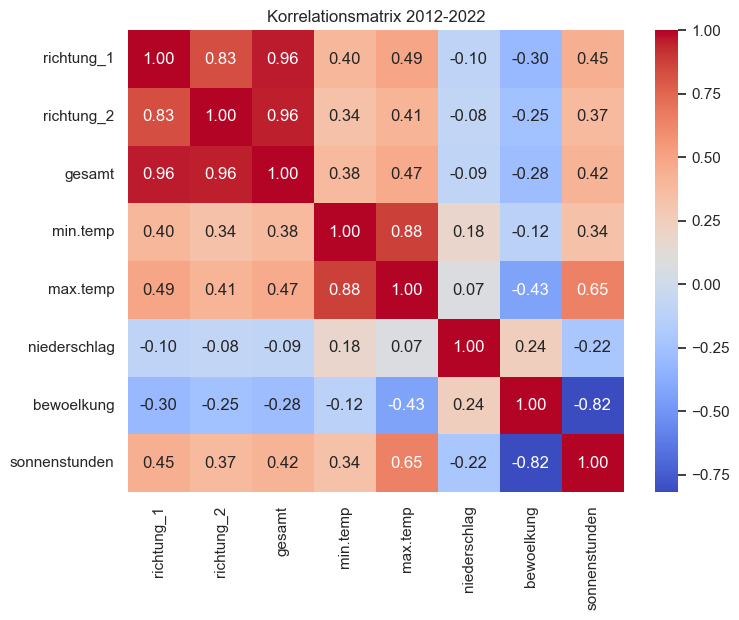

In [254]:
# Plot der Korrelationsmatrix mit Seaborn
sns.set(style="white")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_scaled, annot=True, cmap="coolwarm", fmt=".2f")

# Hinzufügen des Titels
plt.title("Korrelationsmatrix 2012-2022")

# Diagramm anzeigen
plt.show()

# Korrelation in Scatterplot visualisieren

<Axes: xlabel='max.temp', ylabel='gesamt'>

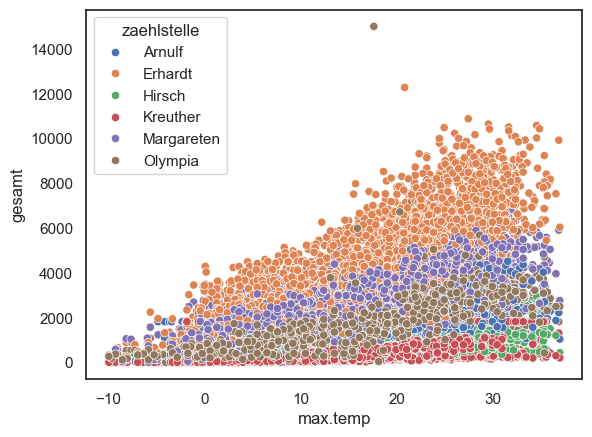

In [272]:
sns.scatterplot(data=df, x="max.temp", y="gesamt", hue="zaehlstelle")

<Axes: xlabel='min.temp', ylabel='gesamt'>

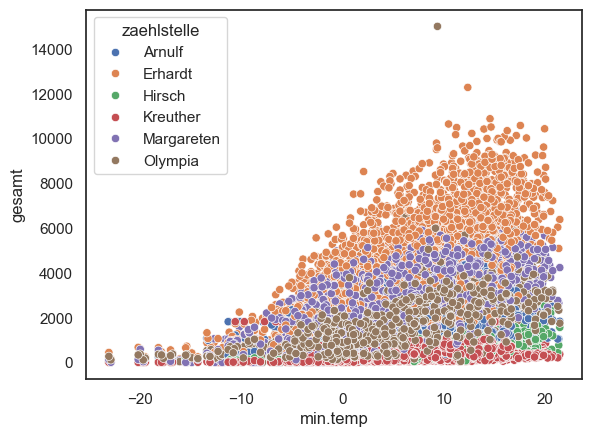

In [277]:
sns.scatterplot(data=df, x="min.temp", y="gesamt", hue="zaehlstelle")

<Axes: xlabel='niederschlag', ylabel='gesamt'>

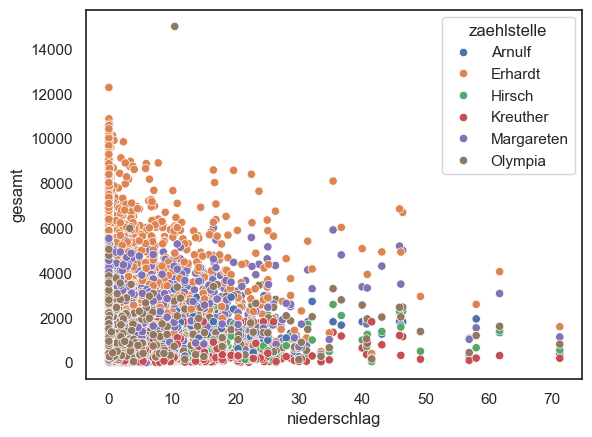

In [278]:
sns.scatterplot(data=df, x="niederschlag", y="gesamt", hue="zaehlstelle")

In [ ]:
sns.set_theme(style="white")

g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

In [ ]:
sns.set_theme(style="ticks")

sns.pairplot(df, hue="zaehlstellen")

# Scatterplot mit Regressionslinie

In [267]:
x=df["gesamt"]
y=df["max.temp"]
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

In [268]:
# Wie funktioniert das?
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

'Regression line: y=10.54+0.00x, r=0.47'

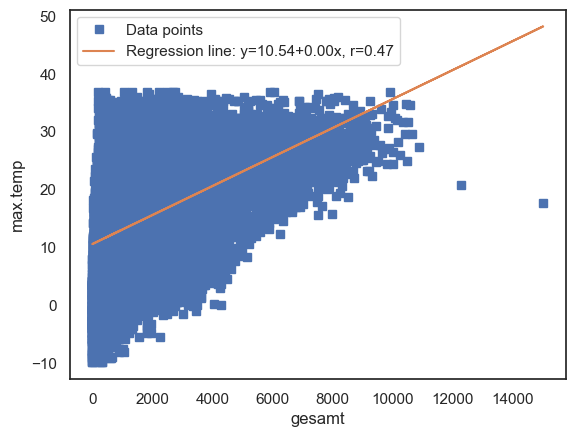

In [270]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('gesamt')
ax.set_ylabel('max.temp')
ax.legend(facecolor='white')
plt.show()